In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
PATH = 'Vehicles'
IMG_WIDTH = 224
IMG_HEIGHT = 224
EPOCHS = 10
LEARNING_RATE = 0.0001
BATCH_SIZE = 32

In [60]:
images = []
classes = []
labels = {}

for i, class_dir in enumerate(os.listdir(PATH)):
    for filename in os.listdir(os.path.join(PATH, class_dir)):
        image = load_img(os.path.join(PATH, class_dir, filename), target_size = (IMG_WIDTH, IMG_HEIGHT), color_mode = 'grayscale')
        image = img_to_array(image)

        classes.append(i)
        images.append(image)
    
    labels[i] = class_dir

    print(f"Load successful from class {class_dir}")

Load successful from class Auto Rickshaws
Load successful from class Bikes
Load successful from class Cars
Load successful from class Motorcycles
Load successful from class Planes
Load successful from class Ships
Load successful from class Trains


In [61]:
x = np.array(images).astype('float32') / 255.0
y = tf.keras.utils.to_categorical(classes, num_classes = len(labels))

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [62]:
model = Sequential([
    Input(shape = (IMG_WIDTH, IMG_HEIGHT, 1)),

    Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Dropout(0.2),
    Flatten(),

    Dense(units = 128, activation = 'relu'),
    Dropout(0.3),
    Dense(units = len(labels), activation = 'softmax')
])

In [63]:
model.compile(optimizer = Adam(learning_rate = LEARNING_RATE), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 128)     

In [64]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val), callbacks = early_stopping)

Epoch 1/10
140/140 [==============================] - 110s 779ms/step - loss: 1.4780 - accuracy: 0.4602 - val_loss: 0.9633 - val_accuracy: 0.6941
Epoch 2/10
140/140 [==============================] - 104s 742ms/step - loss: 1.0411 - accuracy: 0.6442 - val_loss: 0.8013 - val_accuracy: 0.7281
Epoch 3/10
140/140 [==============================] - 105s 747ms/step - loss: 0.8826 - accuracy: 0.7013 - val_loss: 0.7334 - val_accuracy: 0.7567
Epoch 4/10
140/140 [==============================] - 104s 745ms/step - loss: 0.7843 - accuracy: 0.7377 - val_loss: 0.6989 - val_accuracy: 0.7531
Epoch 5/10
140/140 [==============================] - 104s 739ms/step - loss: 0.7055 - accuracy: 0.7683 - val_loss: 0.6315 - val_accuracy: 0.7782
Epoch 6/10
140/140 [==============================] - 101s 723ms/step - loss: 0.6155 - accuracy: 0.7936 - val_loss: 0.6671 - val_accuracy: 0.7603
Epoch 7/10
140/140 [==============================] - 105s 751ms/step - loss: 0.5305 - accuracy: 0.8254 - val_loss: 0.5624 -

In [65]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_real = np.argmax(y_test, axis = 1)

for i in range(20):
    print(f'Sample {i+1}: Actual label: {labels[y_real[i]]}, Predicted label: {labels[y_pred[i]]}')

18/18 [==============================] - 3s 140ms/step
Sample 1: Actual label: Cars, Predicted label: Cars
Sample 2: Actual label: Motorcycles, Predicted label: Motorcycles
Sample 3: Actual label: Planes, Predicted label: Planes
Sample 4: Actual label: Trains, Predicted label: Motorcycles
Sample 5: Actual label: Trains, Predicted label: Trains
Sample 6: Actual label: Ships, Predicted label: Auto Rickshaws
Sample 7: Actual label: Planes, Predicted label: Planes
Sample 8: Actual label: Ships, Predicted label: Ships
Sample 9: Actual label: Motorcycles, Predicted label: Motorcycles
Sample 10: Actual label: Planes, Predicted label: Ships
Sample 11: Actual label: Planes, Predicted label: Planes
Sample 12: Actual label: Auto Rickshaws, Predicted label: Auto Rickshaws
Sample 13: Actual label: Ships, Predicted label: Ships
Sample 14: Actual label: Trains, Predicted label: Trains
Sample 15: Actual label: Motorcycles, Predicted label: Motorcycles
Sample 16: Actual label: Auto Rickshaws, Predicted

In [66]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

18/18 [==============================] - 3s 139ms/step - loss: 0.5315 - accuracy: 0.8050
Test loss: 0.5315259099006653
Test accuracy: 0.8050089478492737


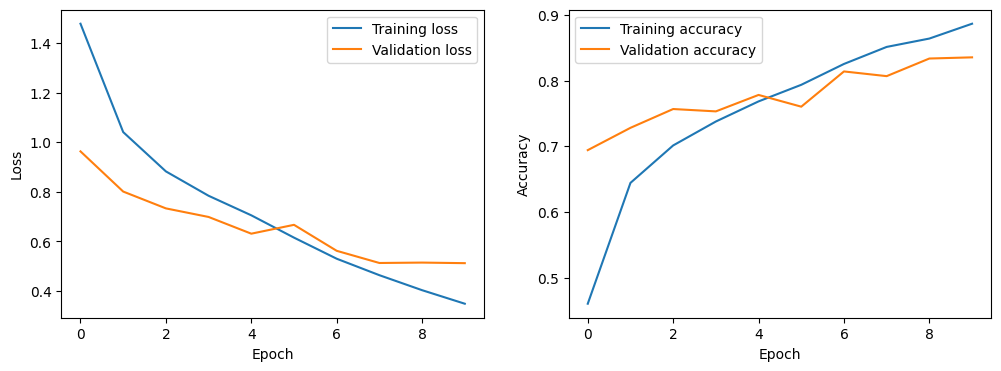

In [67]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()